## Importing Dataset and required libraries

In [33]:
%pip install pandas
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\DimitraGiannouli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\DimitraGiannouli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [34]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [35]:
df_churn = pd.read_csv('Bank Customer Churn Prediction.csv')

## EDA (Analysing Data)

In [36]:
df_churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df_churn.shape # 10,000 records (rows ) , 12 features (columns)

(10000, 12)

In [38]:
df_churn[['credit_score','age','balance','estimated_salary']].describe()

#we can see that we have outliers in balance as mean (which is sensitive to outliers though) is ~76,485 and min is 0.

,credit_score,age,balance,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


In [39]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Using the plots below, we are trying to understand our customers in various aspects such as demographics (gender,country,age) or their interaction with the bank (balance, credit score etc)

C:\Users\DimitraGiannouli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


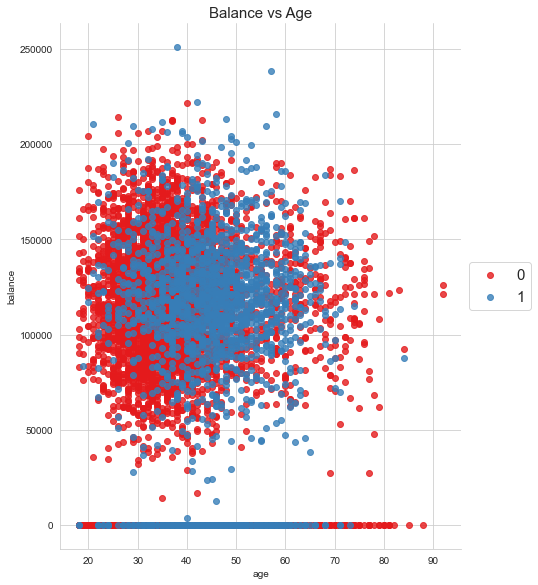

In [40]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='age', y='balance', data=df_churn, 
           fit_reg=False, 
           hue='churn', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Balance vs Age', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

C:\Users\DimitraGiannouli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


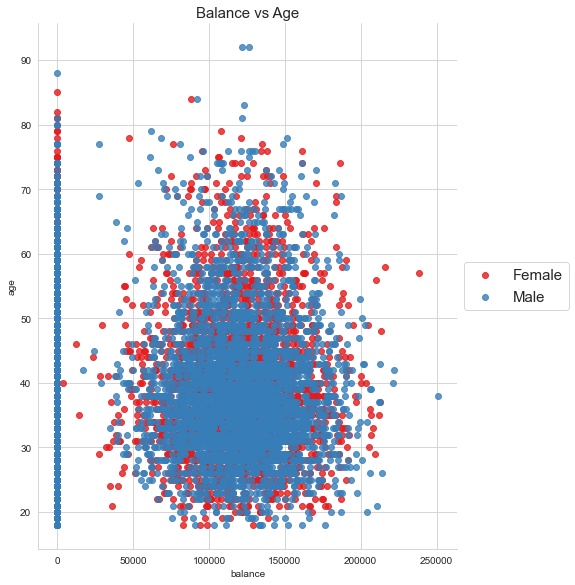

In [41]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='balance', y='age', data=df_churn, 
           fit_reg=False, 
           hue='gender', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Balance vs Age', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

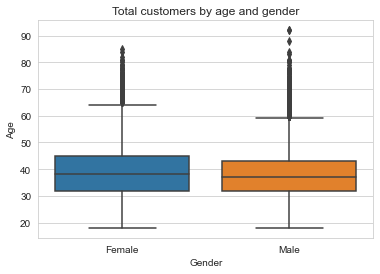

In [42]:


#The male median age is slightly less than the female approx 35 years for males, 37 for females

sns.boxplot(data=df_churn, x='gender', y='age')

plt.title('Total customers by age and gender')
plt.xlabel('Gender')
plt.ylabel('Age')

# Show plot
plt.show()

Text(0, 0.5, 'balance')

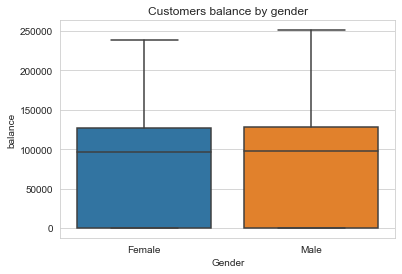

In [43]:
#Relationship between gender and balance
sns.boxplot(data=df_churn, x='gender', y='balance')

plt.title('Customers balance by gender')
plt.xlabel('Gender')
plt.ylabel('balance')


Text(0, 0.5, 'credit score')

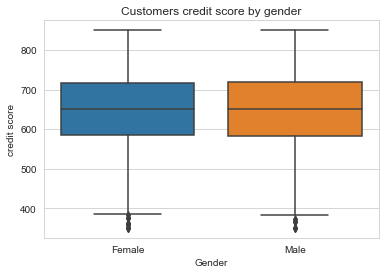

In [44]:
#Relationship between gender and credit score - looks like this dataset is very balanced
sns.boxplot(data=df_churn, x='gender', y='credit_score')

plt.title('Customers credit score by gender')
plt.xlabel('Gender')
plt.ylabel('credit score')

In [45]:
# sns.boxplot(df_churn['balance'], flierprops=dict(marker='o', color='red', markersize=8))

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

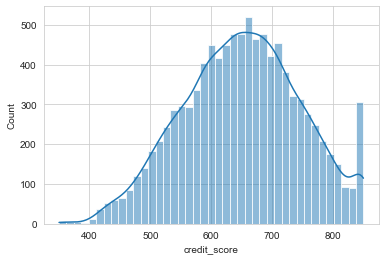

In [46]:

sns.histplot(df_churn['credit_score'], kde=True)

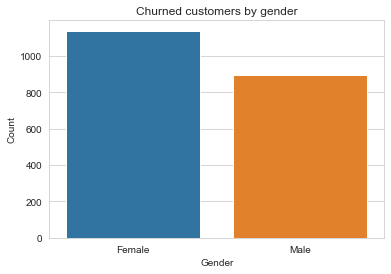

In [47]:
#Understand if there are gender differences to the customers that churned - females tend to churn more than males
sns.countplot(data= df_churn[df_churn['churn'] == 1], x = 'gender')

plt.title('Churned customers by gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show plot
plt.show()

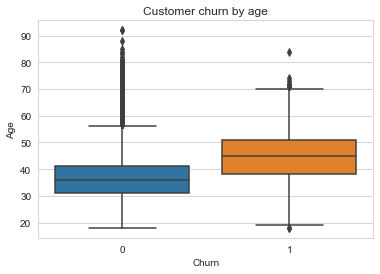

In [48]:
#Plot if there are age differences to customers that churn. Seems that they tend to churn in an older age between 40-50 with a median of ~45. We also realise
#that bank's custoemrs are above the age of 30
sns.boxplot(data=df_churn, x='churn', y='age')

plt.title('Customer churn by age')
plt.xlabel('Churn')
plt.ylabel('Age')

# Show plot
plt.show()

<AxesSubplot:xlabel='balance', ylabel='Count'>

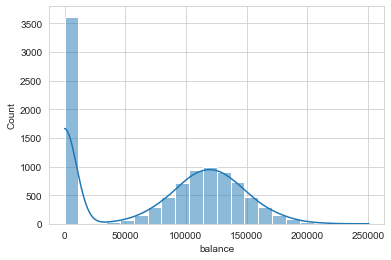

In [49]:
sns.histplot(df_churn['balance'], kde=True) #our histplot is right skewed there are lots customers with balances close to 0?

# Data Preprocessing/Featurisation

Deal with Missing Values

We would have applied an Imputer object for handling missing values, but there are no missing values in our case.

In [50]:
missing_values = df_churn.isnull()
missing_counts = missing_values.sum()
total_missing_counts = missing_counts.sum()
total_missing_counts

0

In [51]:
# #if missing values are not too many, drop them
# missing_values.dropna(inplace=True)

In [52]:
# #if there are more impute them
# imputer = SimpleImputer(strategy='mean')
# df_churn['missing_values'] = imputer.fit_transform(df_churn[['missing_values']])

Encode categorical values

In [53]:
#encode categorical values

df_churn = pd.get_dummies(df_churn, columns=['country','gender'])


In [54]:
#split data into features and labels
X = df_churn.drop(['churn','customer_id'],axis=1)
Y = df_churn['churn']

Feature Scaling

In [55]:

#standard scaler basically standardizes the data , it transforms the data in a way that each feature has a mean of 0 and std of 1 - so they follow the standard
#normal distribution. Standard scaler subtracts the mean of each feature and divides by std.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Split to train and test sets

In [56]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

 Model training - Ensemble learning (Random Forest Classification) plus Hyperparameter Tuning

In [57]:

model = RandomForestClassifier(n_estimators=100,random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5, scoring='accuracy')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [58]:
# selecting and training best model based on accuracy metric
best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50)

Predicting Results

In [59]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

 Model Evaluation

In [60]:
#Model evaluation

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)


Accuracy: 0.864


In [61]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [62]:
#confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1547   60]
 [ 212  181]]


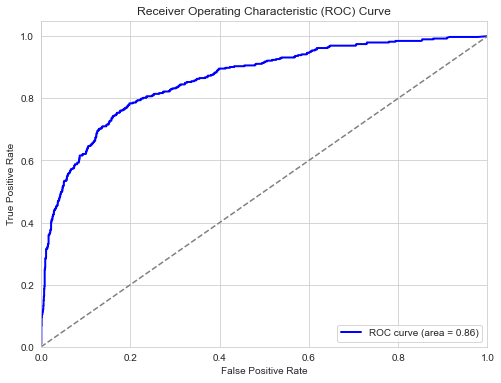

In [63]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

1) Load dataset
2) Perform data preprocessing by handling missing values, encodes categorical values
3)splits data into features and label
4) scale the features using standard scaler
5)split data into train and test sets
6)trainn a random forest classifier on training data
7) evaluates model perdormenc on test dta using accuracy, classification report, confusion matrix

# Problem statement and understanding

Define the problem (predict customer churn)
Understand business contect - Why is customer churn important to the business? What are the consequences of losing customers?

# Data collection and exploration

Gather the dataset
Explore the dataset - understand structurem features, distribution. Identify missing values, outliers, data quality issues

# Data preprocessing

Handle missing values - impute missig valueso r remove rows/cols with significant amount of missing data
Encode categorical variables - convert cat variables into numerical format using one hot encoding or label encoding
Feature scaling - Scale numerical features so they have similar ranges which improves model performance

# Feature engineering

Create new features if necessary 
Feature selection - use techniques like correlation analysis or feature importance to select the most relevant features for modelling

# Model Selection and training

Choose appropriate algorithms - consider ones suitable for classification tasks (logistic regression, decision trees, random forests , svm, gradient booating machines)
Split dataset to training and testing
Train multiplr mofrls - try different models with various hyperparameters to find the best performing model

# Model Evaluation

Evaluate model performance with metrics like accuracy, precision, recall, F1 score, ROC-AUC 
Cross vlidation: perform kfold cross validation to ensure model performance is consistent across different subsets of data

# Hyperparameter tuning


Fine tune model hyperparameters with techniques like grid search/random search to find optimal hps to optimize model performance

# Model interpetation

Understand which features are more influential in perdicting churn using feature importance plots etc

# Deployment and monitoring

Deploy model: integrate model to the company's systems for real time or batch predictions
Monitor performance: monitor performance and retrain the model periodically to account for changes in data

# Presentation

Document the entire process and prepare presentation - prsent findings, methodology, results to stakeholders in a clear and understanable manner highlighting actionable insights and recommendations for reducting churn

In [65]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('Bank Customer Churn Prediction.csv')

# Split data into features and target, drop unecessary cols (eg high-cardinality columns)
X = df.drop(['churn','customer_id'], axis=1)
y = df['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier())
])

# Define hyperparameters grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predictions on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.867


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.50      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [67]:
#confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1539   68]
 [ 198  195]]


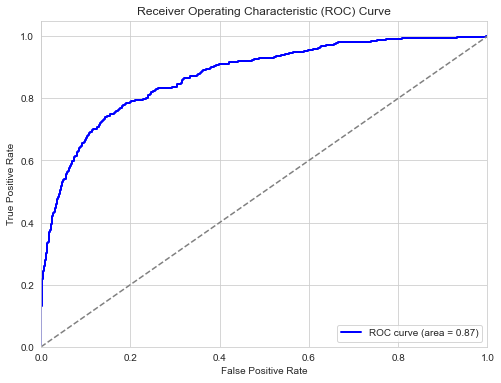

In [68]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Testing other person's Churn Status based on the above model

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [73]:
def predict_churn(data, model):
    
    if type(data) == dict:
        df = pd.DataFrame(data)
    else:
        df = data
    
    y_pred = model.predict(df)
    
    if y_pred == 0:
        return 'Existing Customer'
    elif y_pred == 1:
        return 'Churned Customer'

In [75]:
# test_data = pd.DataFrame({
#     'age': [20, 30, 50],
#     'credit_score': [520, 780, 620],
#     'tenure':['1','8','10'],
#     'credit_card':['0','1','1'],
#     'products_number':['1','3','2'],
#     'active_member':['0','1','1'],
#     'estimated_salary': [42080, 1000000,85000],
#     'balance': [7000, 200000, 300000],
#     'gender': ['Male', 'Female', 'Male'],
#     'country': ['France', 'Germany', 'Spain']
# })


#Give the model an example record to predict if this person will churn . Our model predicts that the person with the below characteristics will churn.
#The interesting fact here is that if we choose gender as Female, the model predicts that customer will churn, but if e change the gender to male
#keeping all other features the same, the model predicts that customer will stay. It's interesting, for future work, to create a feature importance
#graph to understand how the model makes its predictions and how much important are different features for the model. This is one step to spot and eliminate 
#any model biases. 

test_data = pd.DataFrame({
    'age': [30],
    'credit_score': [780],
    'tenure':['8'],
    'credit_card':['1'],
    'products_number':['3'],
    'active_member':['1'],
    'estimated_salary': [1000000],
    'balance': [200000],
    'gender': ['Male'],
    'country': ['Germany']
})

predict_churn(test_data, best_model)

'Existing Customer'

 Save model as pickle file

In [76]:
#save the trained model 'best_model' as a pickle file named 'customer_churn_model' in binary mode (wb) so we can use it later to make predictions through
#our API 

with open('customer_churn_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
# create some dummy data to test the model on

X_test = pd.DataFrame({
    'age': [20, 30, 50],
    'credit_score': [520, 780, 620],
    'tenure':['1','8','10'],
    'credit_card':['0','1','1'],
    'products_number':['1','3','2'],
    'active_member':['0','1','1'],
    'estimated_salary': [42080, 1000000,85000],
    'balance': [7000, 200000, 300000],
    'gender': ['Male', 'Female', 'Male'],
    'country': ['France', 'Germany', 'Spain']
})

In [ ]:
#Make predictions

model_predictions = loaded_model.predict(X_test)
